###### Maestría Inteligencia de Negocios y Análisis de Datos
###### Curso: Text Mining & Image Recognition
###### Alumno: 22008375- Leonel Eduardo Contreras
###### Sección L

## Laboratorio 2

#### Cargar Librerias

In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Problema 1

Desarrolle una funcion que dada una imagen en escala de grises muestre dicha imagen en 3 dimensiones,
donde los ejes X e Y representan el dominio espacial de la imagen y Z representa la
intensidad del color gris de cada pixel.

In [2]:
def imagen_3d(imagen):

    # Leer la imagen en escala de grises
    img=cv2.imread(imagen,cv2.IMREAD_GRAYSCALE)

    #Dimensiones de imagen
    alto=img.shape[0]
    ancho=img.shape[1]

    # Crear la matriz de coordenadas X y Y
    x = np.arange(0, ancho)
    y = np.arange(0, alto)
    X, Y = np.meshgrid(x, y)

    # Visualizar imagen original
    print("Imagen Original")
    plt.imshow(img, cmap="gray")
    plt.show()

    # Crear una figura y un eje 3D
    fig = plt.figure(figsize=(12, 8))
    eje_3d = fig.add_subplot(111, projection='3d')

    # Mostrar la imagen
    print("Imagen en 3D")
    eje_3d.plot_surface(X, Y, img, cmap='gray')
    eje_3d.set_xlabel('X')
    eje_3d.set_ylabel('Y')
    eje_3d.set_zlabel('Intensidad')
    plt.show()






Imagen Original


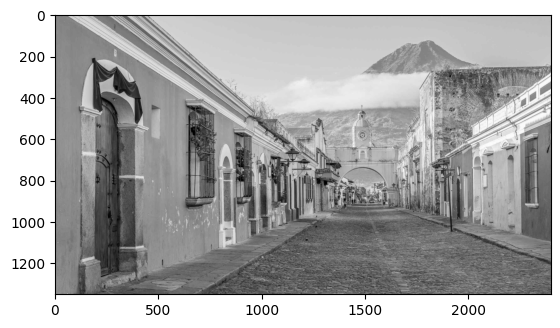

Imagen en 3D


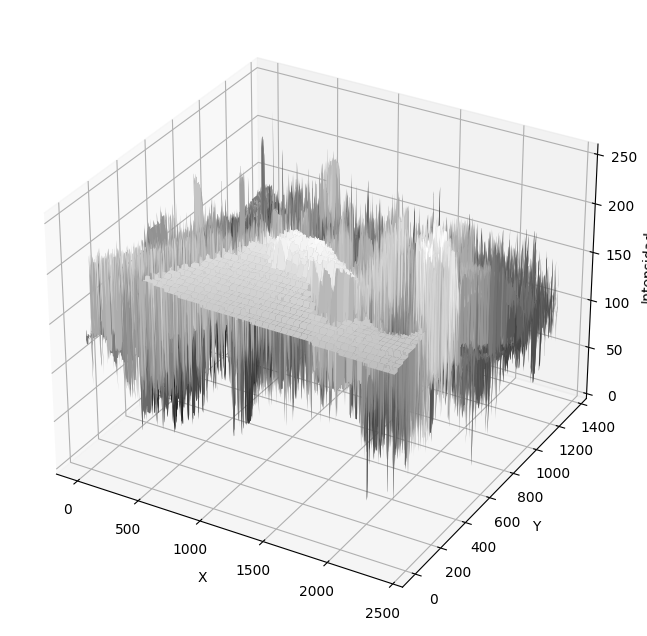

In [3]:
# Usar la funcion
imagen_3d("AntiguaGuatemalaGray.jpg")

#### Problema 2

Implemente una funcion para cada una de las transformaciones vistas en clase: negativa, lineal,
logaritmica y exponencial.

* Negativa

In [27]:
def trans_negativa(imagen):

    # Leer la imagen en escala de grises
    img=cv2.imread(imagen,cv2.IMREAD_GRAYSCALE)

    #Dimensiones de imagen
    alto=img.shape[0]
    ancho=img.shape[1]

    #Crear espacio imagen nueva
    negativa=np.zeros_like(img)

    for i in range(0,alto):
        for j in range(0,ancho):

            pixel=img[i,j]

            negativa[i,j]=(256-1)-pixel
    
    # Volver imagen
    cv2.imwrite("img_negativa.jpg",negativa)
    # Cargar Imagen
    imagen_negativa=cv2.imread("img_negativa.jpg",cv2.IMREAD_GRAYSCALE)

    # Mostrar Imagenes
    print("Imagen Original")
    plt.imshow(img, cmap="gray")
    plt.show()

    print("Imagen Negativa")
    plt.imshow(imagen_negativa, cmap="gray")
    plt.show()

Imagen Original


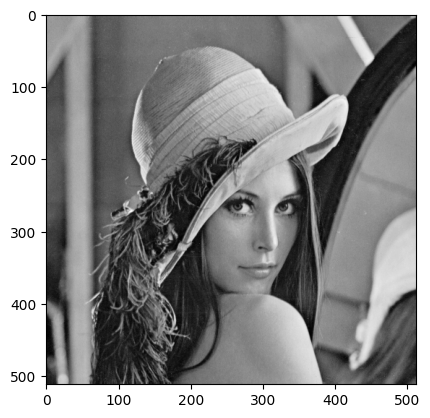

Imagen Negativa


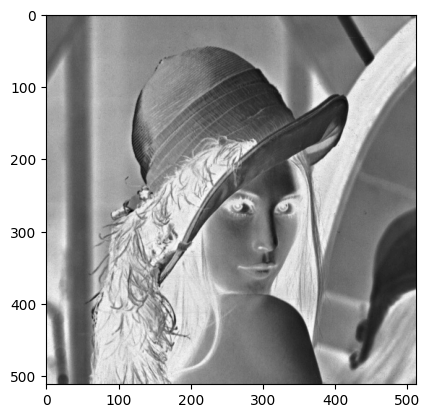

In [30]:
# Usar la funcion
trans_negativa("lenna_gris.png")

* Lineal

In [60]:
def trans_lineal(imagen,alpha,beta):

    # Leer la imagen en escala de grises
    img=cv2.imread(imagen,cv2.IMREAD_GRAYSCALE)

    #Dimensiones de imagen
    alto=img.shape[0]
    ancho=img.shape[1]

    #Crear espacio imagen nueva
    lineal=np.zeros_like(img)

    for i in range(0,alto):
        for j in range(0,ancho):

            pixel=img[i,j]

            lineal[i,j]= int(min(alpha * pixel + beta,255)) # Numero entero, no mayor a 255
    
    # Volver imagen
    cv2.imwrite("img_lineal.jpg",lineal)
    # Cargar Imagen
    imagen_lineal=cv2.imread("img_lineal.jpg",cv2.IMREAD_GRAYSCALE)

    # Mostrar Imagenes
    print("Imagen Original")
    plt.imshow(img, cmap="gray")
    plt.show()

    print("Imagen Lineal")
    plt.imshow(imagen_lineal, cmap="gray")
    plt.show()

Imagen Original


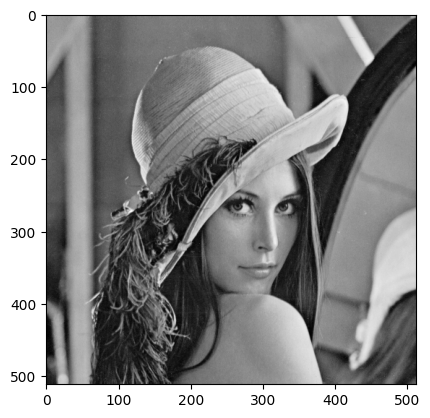

Imagen Lineal


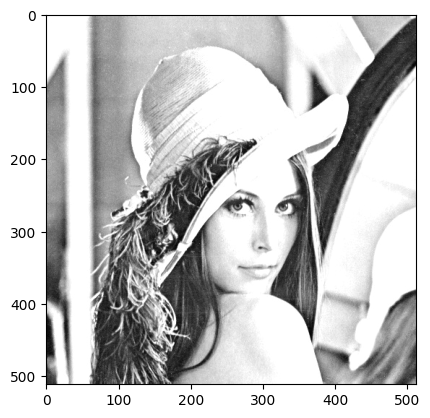

In [64]:
# Usar la funcion
trans_lineal("lenna_gris.png",1.5,30)

* Logaritmica

In [79]:
def trans_log(imagen,alpha):

    # Leer la imagen en escala de grises
    img=cv2.imread(imagen,cv2.IMREAD_GRAYSCALE)

    #Dimensiones de imagen
    alto=img.shape[0]
    ancho=img.shape[1]

    #Crear espacio imagen nueva
    log=np.zeros_like(img)

    for i in range(0,alto):
        for j in range(0,ancho):

            pixel=img[i,j]

            log[i,j]= int(min(alpha*np.log(1+pixel),255)) # Numero entero, no mayor a 255
    
    # Volver imagen
    cv2.imwrite("img_log.jpg",log)
    # Cargar Imagen
    imagen_log=cv2.imread("img_log.jpg",cv2.IMREAD_GRAYSCALE)

    # Mostrar Imagenes
    print("Imagen Original")
    plt.imshow(img, cmap="gray")
    plt.show()

    print("Imagen Logaritmica")
    plt.imshow(imagen_log, cmap="gray")
    plt.show()

Imagen Original


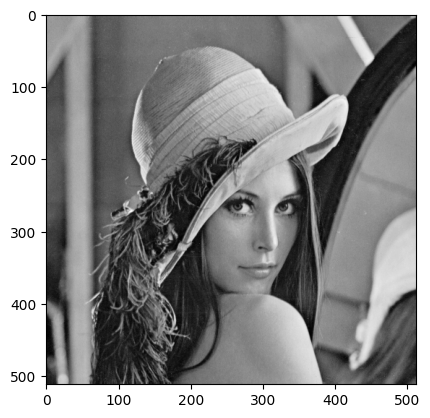

Imagen Logaritmica


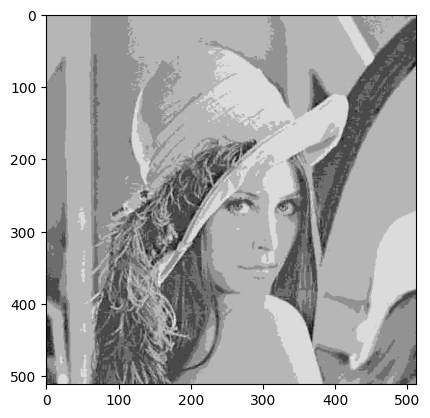

In [82]:
# Usar la funcion
trans_log("lenna_gris.png",2.5)

* Exponencial

In [85]:
def trans_exp(imagen,alpha,factor):

    # Leer la imagen en escala de grises
    img=cv2.imread(imagen,cv2.IMREAD_GRAYSCALE)

    #Dimensiones de imagen
    alto=img.shape[0]
    ancho=img.shape[1]

    #Crear espacio imagen nueva
    exp=np.zeros_like(img)

    for i in range(0,alto):
        for j in range(0,ancho):

            pixel=img[i,j]

            # Normalizar el pixel
            pixel_norm=pixel/255


            exp[i,j]= int(min(alpha*np.power(pixel_norm,factor),255)) # Numero entero, no mayor a 255
    
    # Volver imagen
    cv2.imwrite("img_exp.jpg",exp)
    # Cargar Imagen
    imagen_exp=cv2.imread("img_exp.jpg",cv2.IMREAD_GRAYSCALE)

    # Mostrar Imagenes
    print("Imagen Original")
    plt.imshow(img, cmap="gray")
    plt.show()

    print("Imagen Exponencial")
    plt.imshow(imagen_exp, cmap="gray")
    plt.show()

Imagen Original


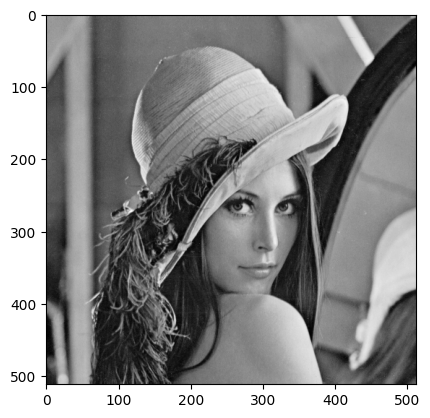

Imagen Exponencial


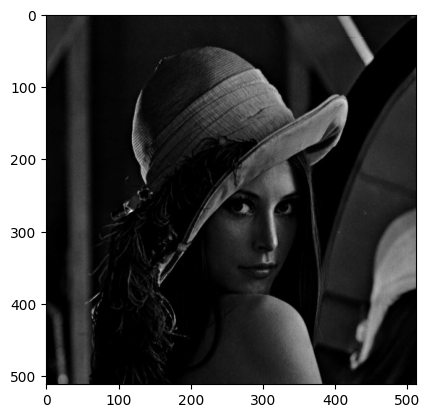

In [108]:
# Usar la funcion
trans_exp("lenna_gris.png",150,4)

#### Problema 3

Desarrolle una funcion que dada dos imagenes a color, realice las operaciones SUMA, RESTA, AND,
OR , XOR con ambas imagenes recuerde que para realizar las operaciones logicas es necesario pasar
la imagen a escala de grises y luego binarizarla.